In [1]:
# importing libraries
import math
import numpy as np
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

ModuleNotFoundError: No module named 'keras'

In [76]:
# Getting data
df = web.DataReader('AAPL', data_source='yahoo', start='2011-01-01', end='2021-4-15')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2011-01-03,11.795000,11.601429,11.630000,11.770357,445138400.0,10.138556
2011-01-04,11.875000,11.719643,11.872857,11.831786,309080800.0,10.191467
2011-01-05,11.940714,11.767857,11.769643,11.928571,255519600.0,10.274836
2011-01-06,11.973214,11.889286,11.954286,11.918929,300428800.0,10.266529
2011-01-07,12.012500,11.853571,11.928214,12.004286,311931200.0,10.340052
...,...,...,...,...,...,...
2021-04-09,133.039993,129.470001,129.800003,133.000000,106513800.0,133.000000
2021-04-12,132.850006,130.630005,132.520004,131.240005,91420000.0,131.240005
2021-04-13,134.660004,131.929993,132.440002,134.429993,91266500.0,134.429993


In [77]:
#Shape of data
df.shape

(2588, 6)

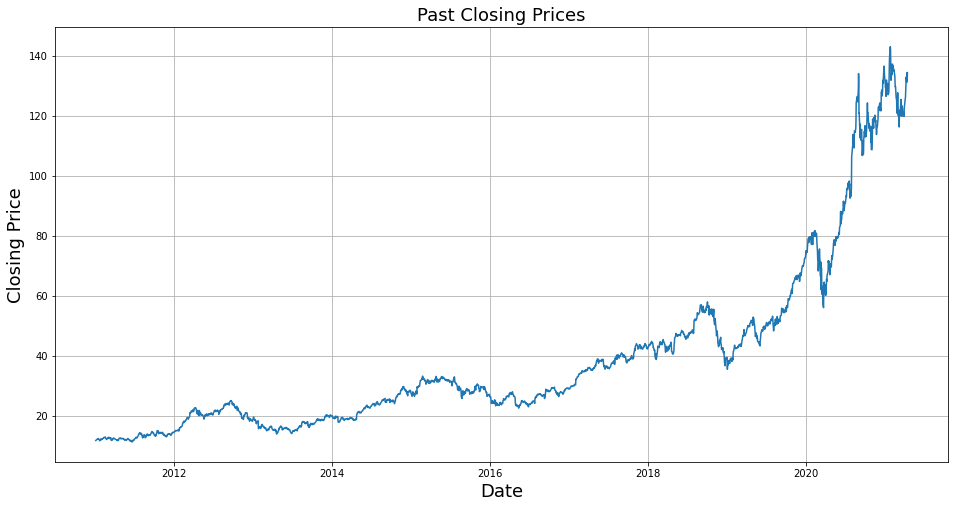

In [78]:
# Visualizing the closing prise
plt.figure(figsize=(16,8))
plt.plot(df['Close'])
plt.xlabel("Date", fontsize = 18)
plt.ylabel("Closing Price", fontsize = 18)
plt.title("Past Closing Prices", fontsize = 18)
plt.grid(True)

In [79]:
# create a new df with only close price
data = df.filter(['Close'])
data

,Close
Date,
2011-01-03,11.770357
2011-01-04,11.831786
2011-01-05,11.928571
2011-01-06,11.918929
2011-01-07,12.004286
...,...
2021-04-09,133.000000
2021-04-12,131.240005
2021-04-13,134.429993


In [80]:
# convert this data into numpy array
# p = np.array(data)
# p

dataset = data.values
dataset

array([[ 11.77035713],
       [ 11.83178616],
       [ 11.92857075],
       ...,
       [134.42999268],
       [132.02999878],
       [134.5       ]])

In [81]:
# number of training data
training_data_len = math.ceil(len(dataset)*0.8)      # 80 % training data
training_data_len

2071

In [82]:
# Scale the data between 0 and 1
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.00385848],
       [0.00432421],
       [0.00505799],
       ...,
       [0.9338127 ],
       [0.91561694],
       [0.93434346]])

In [83]:
# create a training dataset
train_data = scaled_data[0:training_data_len, :]
train_data

array([[0.00385848],
       [0.00432421],
       [0.00505799],
       ...,
       [0.27235755],
       [0.2686615 ],
       [0.27184578]])

In [84]:
# make x_train and y_train
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i,0])
  if i <= 61:
    print(x_train)
    print(y_train)
    print()

[array([0.00385848, 0.00432421, 0.00505799, 0.00498489, 0.00563203,
       0.00734601, 0.00712669, 0.00787942, 0.0082206 , 0.00897876,
       0.00685862, 0.00636853, 0.00470058, 0.00308679, 0.00599216,
       0.0070617 , 0.00772509, 0.00755179, 0.00562661, 0.0064985 ,
       0.0080446 , 0.00785235, 0.00761407, 0.00844263, 0.00989938,
       0.01079833, 0.01159982, 0.01061963, 0.01124511, 0.01187601,
       0.01207096, 0.01294556, 0.01163773, 0.00954197, 0.00630625,
       0.00739205, 0.00746244, 0.00889211, 0.01025951, 0.0092035 ,
       0.00996436, 0.0119789 , 0.01209804, 0.01084167, 0.01094997,
       0.01005913, 0.00848866, 0.00992916, 0.01035427, 0.00815291,
       0.00397762, 0.0052313 , 0.00415633, 0.00649308, 0.00700754,
       0.0064633 , 0.00802835, 0.00980732, 0.00950946, 0.00965027])]
[0.00901936926957736]

[array([0.00385848, 0.00432421, 0.00505799, 0.00498489, 0.00563203,
       0.00734601, 0.00712669, 0.00787942, 0.0082206 , 0.00897876,
       0.00685862, 0.00636853, 0.00

In [85]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [86]:
x_train, y_train

(array([[0.00385848, 0.00432421, 0.00505799, ..., 0.00980732, 0.00950946,
         0.00965027],
        [0.00432421, 0.00505799, 0.00498489, ..., 0.00950946, 0.00965027,
         0.00901937],
        [0.00505799, 0.00498489, 0.00563203, ..., 0.00965027, 0.00901937,
         0.00898688],
        ...,
        [0.21251989, 0.21058658, 0.21073821, ..., 0.27125822, 0.28439329,
         0.27673591],
        [0.21058658, 0.21073821, 0.21360028, ..., 0.28439329, 0.27673591,
         0.27235755],
        [0.21073821, 0.21360028, 0.21394144, ..., 0.27673591, 0.27235755,
         0.2686615 ]]),
 array([0.00901937, 0.00898688, 0.00791733, ..., 0.27235755, 0.2686615 ,
        0.27184578]))

In [87]:
x_train.shape , y_train.shape

((2011, 60), (2011,))

In [88]:
#LSTM requires the 3-D data(no. of samples, no. of times space, no. of features) and our data is 2-D
# So we have to reshape it
# x_train = np.reshape(x_train, (1543, 60, 1))
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(2011, 60, 1)

In [89]:
# Build LSTM model
model = Sequential()
model.add(LSTM(60, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(30, return_sequences=False))
model.add(Dense(15))
model.add(Dense(1))

In [90]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [91]:
# train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2011/2011 [==============================] - 49s 23ms/step - loss: 3.6518e-04


In [92]:
# create a test data
# create a array containing the scaler values fro 1543 to 2003
test_data = scaled_data[training_data_len-60: , :]
#create x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [93]:
# convert the data into numpy array
x_test = np.array(x_test)

In [94]:
x_test.shape, y_test.shape

((517, 60), (517, 1))

In [95]:
# reshaping the data since LSTM requires 3-D data not 2-D
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_test.shape

(517, 60, 1)

In [96]:
# predict the closed price
predictions = model.predict(x_test)
# unscale the values
predictions = scaler.inverse_transform(predictions)

In [97]:
#evaluating the model (testing the model)
# we can test by finding root mean squared error (RMSE)
rmse = np.sqrt( np.mean( predictions - y_test )**2 )
rmse

0.25849685078663337

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


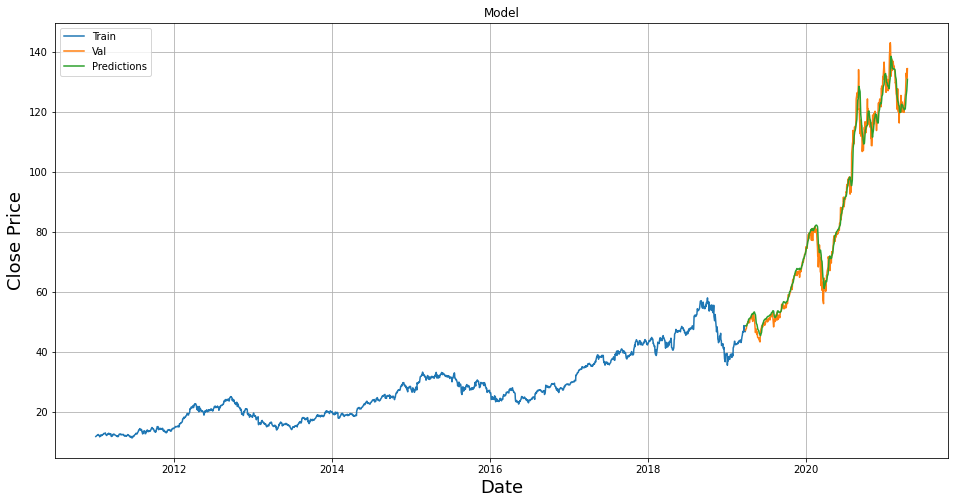

In [98]:
#plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize = (16,8))
plt.title("Model")
plt.xlabel("Date", fontsize=18)
plt.ylabel("Close Price", fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc = 'upper left')
plt.grid(True)
plt.show()

In [99]:
import sklearn
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, predictions)

9.602721411865506

In [100]:
# show actual and predicted price
valid

,Close,Predictions
Date,,
2019-03-28,47.180000,48.706352
2019-03-29,47.487499,48.660744
2019-04-01,47.810001,48.649662
2019-04-02,48.505001,48.699337
2019-04-03,48.837502,48.864986
...,...,...
2021-04-09,133.000000,125.411545
2021-04-12,131.240005,127.156075
2021-04-13,134.429993,128.541214


In [101]:
# Get the data
data = web.DataReader('AAPL', data_source='yahoo', start='2011-04-08', end='2021-4-08')
# new data frame
new_df = data.filter(['Close'])
# get last 60 days value
new_df = new_df[-60:]
# convert it to array
new_df = new_df.values
# scale them
new_df_scale = scaler.transform(new_df)
# create empty list
test = []
# append scaler data in it
test.append(new_df_scale)
# convert it to numpy
test = np.array(test)
# reshape it in 3D
test = np.reshape(test, (test.shape[0], test.shape[1], 1))
# predict
pred_price = model.predict(test)
# unscaled it
pred_price = scaler.inverse_transform(pred_price)
print("Predict Close Price of Apple: ",pred_price[0][0])

latest_data = web.DataReader('AAPL', data_source='yahoo', start='2021-04-09', end='2021-4-09')
latest_df = latest_data.filter(['Close']).values
print("Actual Close Price of Apple: ",latest_df[0][0])
rmse = np.sqrt( np.mean( pred_price - latest_df )**2 )
print("RMSE = ", rmse)

Predict Close Price of Apple:  125.41154
Actual Close Price of Apple:  133
RMSE =  7.588462829589844
